<a href="https://colab.research.google.com/github/Yomunozs/Aprendizaje_Maquina/blob/main/4_Clasificacion_Clustering_DR/SimulacionMonteCarloFOB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtración binaria óptima

# Principios en teoría de detección y reconocimiento de patrones (clasificación)

- Se presenta un ejemplo ilustrativo de detección de nive DC desde un problema de test de hipotésis.

- Además, se ilustra el concepto de simulaciones de Monte Carlo, como alternativa a la estimación de la distribución del estimador.


- Hipótesis nula: señal (datos) recibida es ruido.

$$H_o: x[n] = w[n]$$

- Hipótesis no nula: señal (datos) recibida es nivel DC más ruido.

$$H_1: x[n] = A + w[n]$$

**Nota**: en este caso se asume ruido blanco Gaussiano $w\sim \mathcal{N}(w|0,\sigma^2).$


- Para la simulación de Monte-Carlo con M repeticiones se utilizará un estimador de media simple:

 $$\hat{A}[m] = \frac{1}{N}\sum^N_{n=1} x[n]$$
 donde $\hat{A}_m$ corresponde a la $m$-ésima estimación sobre las $M$ iteraciones.

 - A partir del areglo de $M$ simulaciones de Monte Carlo, se puede utilizar un conteo simple (frecuencia relativa) para calcular la probabilidad de masa del estimador.

- Se compara la influencia en el estimador para $N =\{1,20\}$

- Se fijan $M = 100$ repeticiones del experimento de Monte Carlo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = 1 # nivel DC
N1 = 1 # muestras a considerar en la detección N=1
N2 = 20 # N=20
M = 100 # simulaciones monte carlo
varw = 0.5 #varianza del ruido
T1sr = np.zeros(M)
T2sr = np.zeros(M)
T1r = np.zeros(M)
T2r = np.zeros(M)

for m in range(M):#iteraciones de Monte Carlo
  w1 = np.sqrt(varw)*np.random.randn(N1) # ruido simulado para N = 1
  w2 = np.sqrt(varw)*np.random.randn(N2) # ruido simulado para N = 20
  x1 = A + w1 #señal recibida
  x2 = A + w2
  #detector sobre señal mas ruido
  T1sr[m] = x1.mean()
  T2sr[m] = x2.mean()
  #detector sobre solo ruido
  T1r[m] = w1.mean()
  T2r[m] = w2.mean()

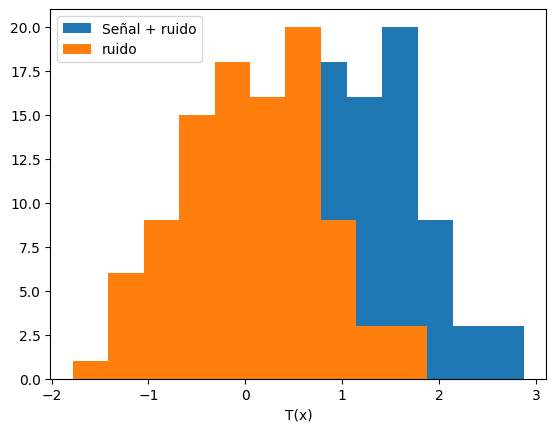

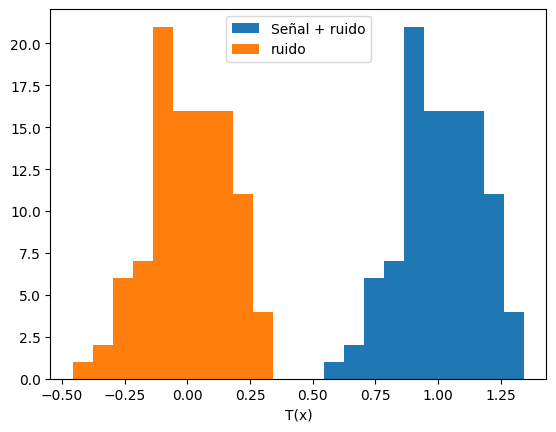

In [ ]:
import matplotlib.pyplot as plt
#graficar las probabilidades del estimador
plt.hist(T1sr,label='Señal + ruido')
plt.hist(T1r,label='ruido')
plt.xlabel('T(x)')
plt.legend()
plt.show()

plt.hist(T2sr,label='Señal + ruido')
plt.hist(T2r,label='ruido')
plt.xlabel('T(x)')
plt.legend()
plt.show()

# Ejercicio:

1. Cálcule el coeficiente de desvio para los resultados obtenidos. Ver [Conceptos Teoría Detección](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion/1_TeoriaDeteccion.pdf).

La formula que define el coeficiente de desvio esta dada como:
$$
d^2 = \frac{(E\{T(x); H_1\} - E\{T(x); H_0\})^2}{\text{var}\{T(x); H_0\}}
$$

In [ ]:
# Cálculo de la esperanza y varianza para N = 1
E_T1_H1 = np.mean(T1sr)
E_T1_H0 = np.mean(T1r)
var_T1_H0 = np.var(T1r)

# Cálculo de la esperanza y varianza para N = 20
E_T2_H1 = np.mean(T2sr)
E_T2_H0 = np.mean(T2r)
var_T2_H0 = np.var(T2r)

# Coeficientes d^2 para N = 1 y N = 20
d2_T1 = (E_T1_H1 - E_T1_H0)**2 / var_T1_H0
d2_T2 = (E_T2_H1 - E_T2_H0)**2 / var_T2_H0

print(f"d^2 para N=1: {d2_T1}")
print(f"d^2 para N=20: {d2_T2}")

#Ayuda, Calculado como el nivel DC
d0 = np.sqrt(A**2)/varw
d1 = N2*np.sqrt(A**2)/varw
print(d0,d1)



d^2 para N=1: 1.9854602866303606
d^2 para N=20: 40.09080363731486
2.0 40.0


In [ ]:
# Para n=1, el valor es 1.98, este valor relativamente pequeño sugiere que con solo una muestra, la diferencia entre las esperanzas bajo ​es baja en comparación con la varianza del ruido.
#Esto indica que es más difícil distinguir la señal del ruido cuando tienes solo una muestra.
#En este caso, la potencia del detector es limitada y hay más probabilidad de que se cometan errores en la detección.

#Para n=20, el valor es mucho más alto, significa que al aumentar el número de muestras, la diferencia entre las esperanzas ​crece de manera significativa en relación con la varianza del ruido.
#Esto indica que el detector es mucho más eficaz en diferenciar entre la señal y el ruido, lo que lleva a una detección más robusta con menos probabilidad de error.



2. Compare la capacidad de detección del estimador $\tilde{A}=x[0]$ respecto al de media muestral $\hat{A} = \frac{1}{N}\sum^N_{n=1} x[n]$.

Estimador 1: sesgo = 0, Estimador 2: 0
Varianza 1: $\sigma^2$, Estimador 2: $\sigma^2/N$

$$mse(\hat{\theta})=var(\hat{\theta})+b^2(\hat{\theta})$$

In [ ]:
# MSE para el estimador 1 (una sola muestra)
MSE_1 = varw**2  # varianza = sigma^2

# MSE para el estimador 2 (media muestral con 20 muestras)
MSE_2 = varw**2 / N2  # varianza = sigma^2 / N


# Mostrar resultados
print(f"MSE del Estimador 1 (una sola muestra): {MSE_1}")
print(f"MSE del Estimador 2 (media muestral con N=20): {MSE_2}")


MSE del Estimador 1 (una sola muestra): 0.25
MSE del Estimador 2 (media muestral con N=20): 0.0125
